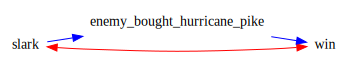

In [3]:
import pandas as pd
from ananke.graphs import ADMG
from ananke.estimation import CausalEffect
import numpy as np

data = pd.read_csv('all_data.csv')
slark_data = pd.read_csv('all_data_slark.csv')
slark_data['slark'] = True
complete = pd.merge(data, slark_data, how='left').fillna(False)
G = ADMG(vertices=['slark', 'enemy_bought_hurricane_pike', 'win'], di_edges=[('slark', 'enemy_bought_hurricane_pike'), ('enemy_bought_hurricane_pike', 'win')], bi_edges=[('slark', 'win')])
G.draw('LR')
# G = ADMG(vertices=['slark', 'enemy_bought_hurricane_pike', 'win', 'confounders'], di_edges=[('slark', 'enemy_bought_hurricane_pike'), ('enemy_bought_hurricane_pike', 'win'), ('confounders', 'slark'), ('confounders', 'win')])

In [4]:
ace_obj = CausalEffect(graph=G, treatment='slark', outcome='win')
ace = ace_obj.compute_effect(complete, 'eff-apipw', n_bootstraps=1000, alpha=0.05)
print("ace =", ace)
odds, Ql, Qu = np.exp(ace)
print("Causal odds under front-door =", odds, "(", Ql, Qu, ")")
print('Amount of rows =', len(complete))


 Treatment is p-fixable and graph is mb-shielded. 

 Available estimators are:

1. Primal IPW (p-ipw)
2. Dual IPW (d-ipw)
3. APIPW (apipw)
4. Efficient APIPW (eff-apipw) 
 
Suggested estimator is Efficient APIPW 

ace = (0.19612535139305284, 0.11463212620578017, 0.2737090441840856)
Causal odds under front-door = 1.216679408234612 ( 1.1214608056367157 1.3148321885073808 )
Amount of rows = 241926
